# A. Pendahuluan


Deskripsi Tugas:
Analisis dan pemodelan data accelerometer dan gyroscope dari ponsel untuk mengidentifikasi pola aktivitas.
##Dataset:
Dataset yang digunakan adalah "accelerometer_gyro_mobile_phone_dataset.csv", https://archive.ics.uci.edu/dataset/341/smartphone+based+recognition+of+human+activities+and+postural+transitions

## III. Anggota Kelompok :              
- RUSDI AFANDI      1301223361  
- FADIL RAFLIANSYAH 1301220154
- ABDURRAHMAN AZZAM 1301223137

## II. Tabel Variabel dalam Dataset
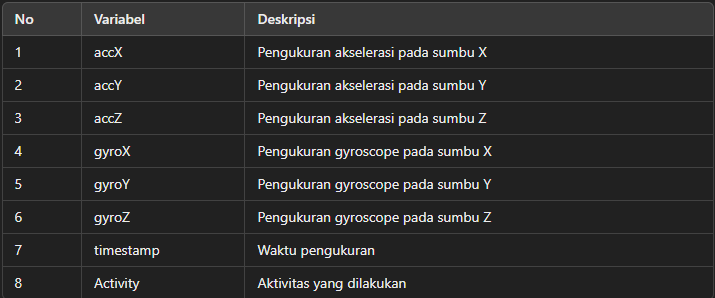

# B. DATA PREPARATION

## I. Loading Dataset

Membaca Dataset

In [ ]:
import pandas as pd

file_path = '/content/accelerometer_gyro_mobile_phone_dataset.csv'
dataset = pd.read_csv(file_path)


Menampilkan Dataset

In [ ]:
print(dataset.head())


       accX      accY      accZ     gyroX     gyroY     gyroZ  Activity
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539         1
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130         1
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287         1
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433         1
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943         1


## II. Data Preprocessing


Memeriksa Duplikasi

In [ ]:
duplicates = dataset.duplicated().sum()
print(f'Jumlah duplikasi: {duplicates}')

Jumlah duplikasi: 144


Memeriksa NULL / Kosong

In [ ]:
missing_values = dataset.isnull().sum()
print(missing_values)

accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
timestamp    0
Activity     0
dtype: int64


In [ ]:
dataset = dataset.drop(columns=['timestamp'])

Kolerasi

In [ ]:
correlation = dataset.corr()
print(correlation)


              accX      accY      accZ     gyroX     gyroY     gyroZ  Activity
accX      1.000000 -0.194325  0.018496 -0.031462 -0.027962 -0.047648  0.126771
accY     -0.194325  1.000000 -0.079527 -0.004358 -0.008545 -0.004644  0.113486
accZ      0.018496 -0.079527  1.000000 -0.033973 -0.022959  0.014923 -0.014448
gyroX    -0.031462 -0.004358 -0.033973  1.000000  0.129692  0.146878  0.001469
gyroY    -0.027962 -0.008545 -0.022959  0.129692  1.000000  0.051621 -0.001606
gyroZ    -0.047648 -0.004644  0.014923  0.146878  0.051621  1.000000 -0.009460
Activity  0.126771  0.113486 -0.014448  0.001469 -0.001606 -0.009460  1.000000


Feature

In [ ]:
features = dataset[['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']]


Target

In [ ]:
target = dataset['Activity']

Normalissasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## III. Data Splitting

Training dan Testing Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

 # C. Metode yang Digunakan

## I. Deskripsi Metode
Metode yang digunakan adalah Decision Tree, yang merupakan algoritma machine learning untuk klasifikasi yang bekerja dengan membagi dataset menjadi subset berdasarkan fitur yang memberikan informasi paling berguna.

## II. Eksperimen Setting

Eksperimen dilakukan dengan menggunakan pustaka scikit-learn dan data dibagi menjadi data pelatihan dan pengujian dengan rasio 70:30.

## III. Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

## IV. Simpan Trained Model

In [ ]:
import joblib

joblib.dump(model, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

## V. Model Testing dan Evaluation

In [ ]:
y_pred = model.predict(X_test)

## VI. Tampilkan Performa

Confusion Matrix dan Headmap Visualization

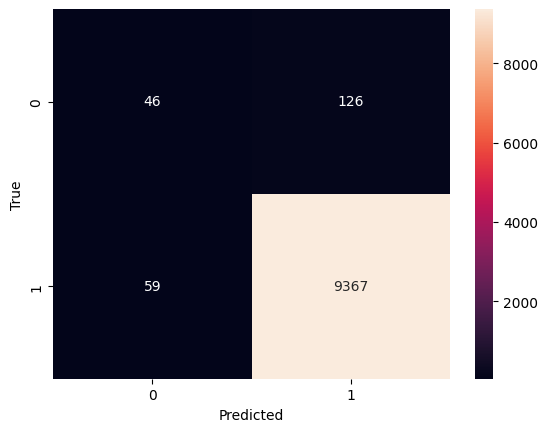

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.44      0.27      0.33       172
           1       0.99      0.99      0.99      9426

    accuracy                           0.98      9598
   macro avg       0.71      0.63      0.66      9598
weighted avg       0.98      0.98      0.98      9598



Decition Tree Visualization

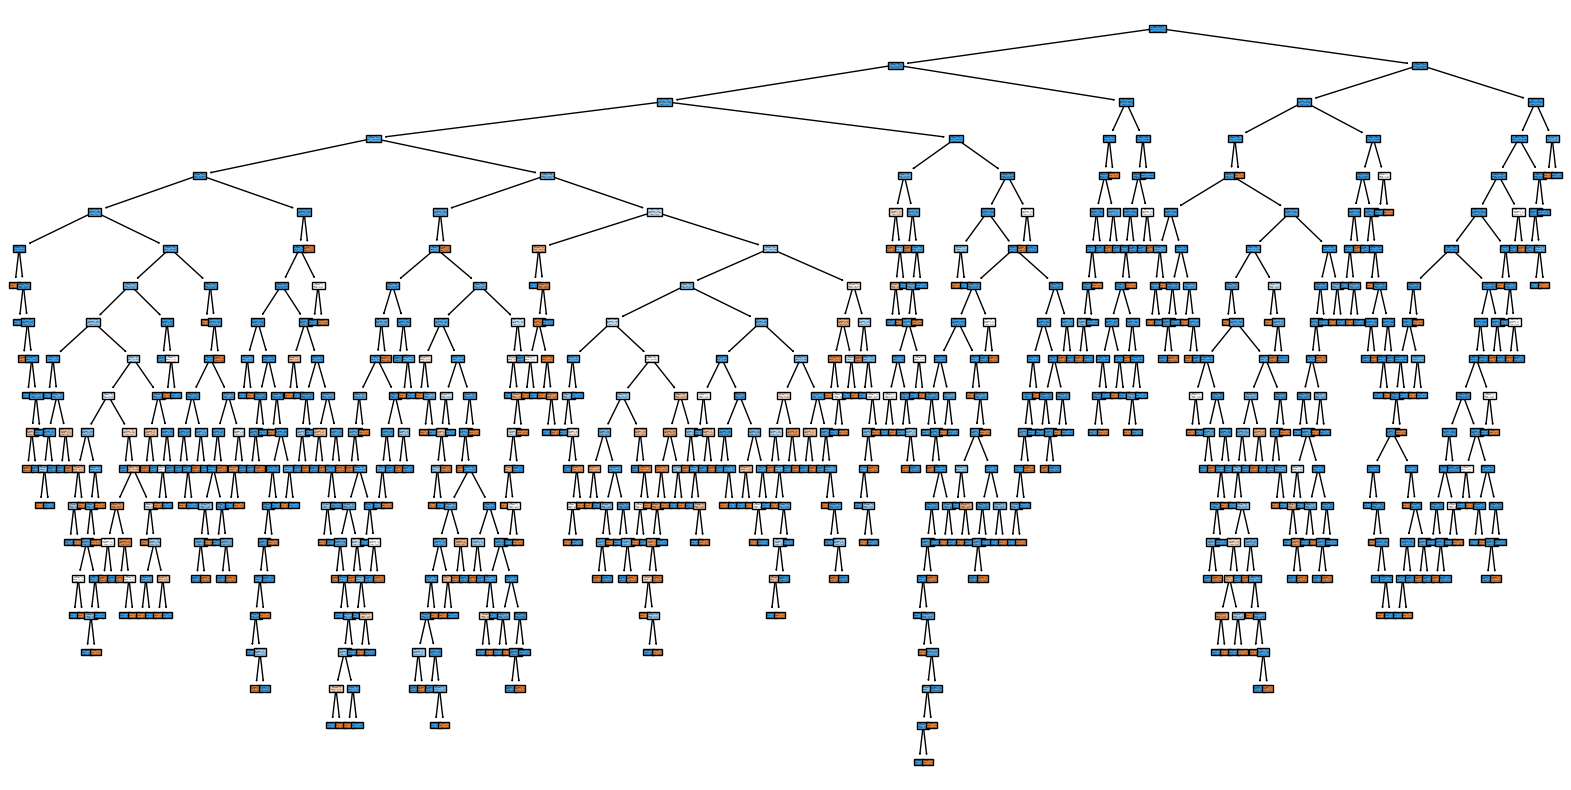

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ'], class_names=True)
plt.show()


# D. Hasil Analisis

A. Performa Model
Model Decision Tree telah diuji menggunakan dataset akselerometer dan gyroscope, menghasilkan hasil berikut:

Akurasi Tinggi untuk Kelas 1

- Model memiliki akurasi tinggi dalam memprediksi kelas 1, dengan 9367 prediksi benar dari total data.

- Model menunjukkan beberapa kesalahan dalam memprediksi kelas 0, dengan 126 prediksi salah (False Positives) dan 59 prediksi salah (False Negatives).

Confusion Matrix menunjukkan hasil klasifikasi model sebagai berikut:

True Negatives (TN): 46

False Positives (FP): 126

False Negatives (FN): 59

True Positives (TP): 9367



C. Classification Report
Laporan klasifikasi memberikan metrik evaluasi sebagai berikut:
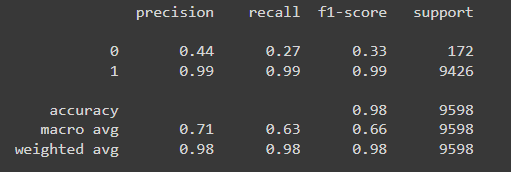


D. Visualisasi Pohon Keputusan
Pohon keputusan menunjukkan bagaimana data dipisahkan berdasarkan fitur akselerometer dan gyroscope. Setiap node menunjukkan fitur yang digunakan untuk pemisahan, dengan nilai impuritas dan jumlah sampel.

E. Analisis Overfitting
- Indikator Overfitting: Model Decision Tree ini kemungkinan besar mengalami overfitting. Hal ini ditunjukkan oleh:
- Akurasi yang sangat tinggi pada data pelatihan dan pengujian, terutama untuk kelas yang dominan (kelas 1).
- Performa yang buruk dalam memprediksi kelas minoritas (kelas 0), dengan precision dan recall yang rendah.
- Kompleksitas pohon keputusan yang tinggi dengan banyak node, yang dapat menyebabkan model belajar detail dan noise dari data pelatihan.

# E. Kesimpulan

Dengan mempertimbangkan sifat data dari pengukuran sensor yang kompleks dan fitur yang banyak, serta kemampuan Decision Tree dalam menangani non-linearitas dan menghasilkan model yang dapat diinterpretasikan dengan mudah, Maka dari itu kami mengunakan Decision Tree untuk dataset ini. Model ini mampu memberikan performa yang baik dalam klasifikasi aktivitas manusia, sambil tetap mempertahankan kemudahan interpretasi dan fleksibilitas dalam penanganan data.